In [6]:
import random
import pandas as pd
import requests
import numpy as np

### File sampling
We're working with a log file generated from <a href="http://www.bro.og/">Bro</a>

A Bro log is similar to netflow logs. The log file we're using is huge and doesn't fit in memory.

Therefore, we're setting the variable **sample_percent** to read in between 200k and 300k worth of (randomly selected) lines from the file.

In [7]:
logfile = './conn_sample.log'
sample_percent = .09
num_lines = sum(1 for line in open(logfile))
slines = set(sorted(random.sample(range(num_lines), int(num_lines * sample_percent))))
print (('%s lines in %s, using a sample of %s lines') %(num_lines, logfile, len(slines)))

22694 lines in ./conn_sample.log, using a sample of 2042 lines


In [8]:
outfile = './out_sample'

w = open(outfile, 'w+')
r = open(logfile, 'r+')
linecount = 0
for line in r:
    if linecount in slines:
        w.write(line)
    linecount += 1
w.close()
r.close()

In [9]:
outfile = './conn_sample.log'
df = pd.read_csv(outfile, sep="\t", header=None, names=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','threat','sample'])

In [10]:
df.head()
#df.tail()
#df.head(100)
#df.tail(100)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
0,1.331901e+09,C6SwUo2lWDfrpgfgVl,192.168.202.79,50504,192.168.229.251,80,tcp,http,0.010000,182,...,-,0,ShADfFa,4,398,3,382,(empty),NaN,NaN
1,1.331901e+09,C26Bhi2scZzizn7ph9,192.168.202.79,50681,192.168.229.251,80,tcp,http,0.010000,172,...,-,0,ShADdfFa,5,440,4,501,(empty),NaN,NaN
2,1.331901e+09,CnbU9V2P0WWwMlO1l,192.168.202.76,51719,213.199.179.147,80,tcp,-,3.010000,0,...,-,0,S,2,104,0,0,(empty),NaN,NaN
3,1.331901e+09,Cyu9CADFj5Kg5rhf4,192.168.202.79,48479,192.168.229.153,49160,tcp,-,0.010000,198,...,-,0,ShADdfFa,5,466,4,334,(empty),NaN,NaN
4,1.331901e+09,CcUhD5kLSPzplLI5e,192.168.202.100,45658,192.168.27.152,17533,udp,-,-,-,...,-,0,D,1,28,0,0,(empty),NaN,NaN


In [11]:
df.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,threat,sample
count,2.269400e+04,22694.000000,22694.000000,22694.0,22694.000000,2.269400e+04,22694.000000,2.269400e+04,0.0,0.0
mean,1.331949e+09,42753.924077,20598.650612,0.0,11.734511,1.626597e+03,11.166476,1.865159e+03,NaN,NaN
std,4.277650e+04,15289.541275,20788.309643,0.0,1563.859576,2.276985e+05,1558.312166,2.548142e+05,NaN,NaN
min,1.331901e+09,3.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
25%,1.331908e+09,36057.750000,2133.000000,0.0,1.000000,4.400000e+01,0.000000,0.000000e+00,NaN,NaN
50%,1.331928e+09,44316.000000,10379.000000,0.0,1.000000,4.800000e+01,1.000000,4.000000e+01,NaN,NaN
75%,1.331997e+09,54534.500000,38230.500000,0.0,1.000000,6.000000e+01,1.000000,4.000000e+01,NaN,NaN
max,1.332018e+09,65491.000000,65535.000000,0.0,235588.000000,3.430141e+07,234752.000000,3.837745e+07,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              22694 non-null  float64
 1   uid             22694 non-null  object 
 2   id.orig_h       22694 non-null  object 
 3   id.orig_p       22694 non-null  int64  
 4   id.resp_h       22694 non-null  object 
 5   id.resp_p       22694 non-null  int64  
 6   proto           22694 non-null  object 
 7   service         22694 non-null  object 
 8   duration        22694 non-null  object 
 9   orig_bytes      22694 non-null  object 
 10  resp_bytes      22694 non-null  object 
 11  conn_state      22694 non-null  object 
 12  local_orig      22694 non-null  object 
 13  missed_bytes    22694 non-null  int64  
 14  history         22694 non-null  object 
 15  orig_pkts       22694 non-null  int64  
 16  orig_ip_bytes   22694 non-null  int64  
 17  resp_pkts       22694 non-null 

In [13]:
df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
threat            float64
sample            float64
dtype: object

In [14]:
from datetime import datetime
df['ts'] = [datetime.fromtimestamp(float(date)) for date in df['ts'].values]

In [15]:
df.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
threat                   float64
sample                   float64
dtype: object

##### Testing a small operation for fun
In the following code we're trying to find the percentage of TCP connections:

In [16]:
float(len(df[df.proto=='tcp']))/len(df.proto)*100.0

98.19335507182515

In [18]:
df.convert_dtypes().dtypes
# df.convert_objects(convert_numeric=True).dtypes

ts                datetime64[ns]
uid                       string
id.orig_h                 string
id.orig_p                  Int64
id.resp_h                 string
id.resp_p                  Int64
proto                     string
service                   string
duration                  string
orig_bytes                string
resp_bytes                string
conn_state                string
local_orig                string
missed_bytes               Int64
history                   string
orig_pkts                  Int64
orig_ip_bytes              Int64
resp_pkts                  Int64
resp_ip_bytes              Int64
tunnel_parents            string
threat                     Int64
sample                     Int64
dtype: object

Here, we can see that *orig_bytes* and *resp_bytes* have been changed to the type *float64*.

In [19]:
import numpy as np
df_without = df.drop(['threat','sample'], axis=1)
df.drop(df.columns[[0, 1, 2, 4, 11, 18, 19]], axis=1) 
df_without.describe(include=[np.number])

,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,22694.000000,22694.000000,22694.0,22694.000000,2.269400e+04,22694.000000,2.269400e+04
mean,42753.924077,20598.650612,0.0,11.734511,1.626597e+03,11.166476,1.865159e+03
std,15289.541275,20788.309643,0.0,1563.859576,2.276985e+05,1558.312166,2.548142e+05
min,3.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,36057.750000,2133.000000,0.0,1.000000,4.400000e+01,0.000000,0.000000e+00
50%,44316.000000,10379.000000,0.0,1.000000,4.800000e+01,1.000000,4.000000e+01
75%,54534.500000,38230.500000,0.0,1.000000,6.000000e+01,1.000000,4.000000e+01
max,65491.000000,65535.000000,0.0,235588.000000,3.430141e+07,234752.000000,3.837745e+07


In [20]:
df_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ts              22694 non-null  datetime64[ns]
 1   uid             22694 non-null  object        
 2   id.orig_h       22694 non-null  object        
 3   id.orig_p       22694 non-null  int64         
 4   id.resp_h       22694 non-null  object        
 5   id.resp_p       22694 non-null  int64         
 6   proto           22694 non-null  object        
 7   service         22694 non-null  object        
 8   duration        22694 non-null  object        
 9   orig_bytes      22694 non-null  object        
 10  resp_bytes      22694 non-null  object        
 11  conn_state      22694 non-null  object        
 12  local_orig      22694 non-null  object        
 13  missed_bytes    22694 non-null  int64         
 14  history         22694 non-null  object        
 15  or

In [21]:
df.median()

/tmp/ipykernel_14899/530051474.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()
/tmp/ipykernel_14899/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


id.orig_p        44316.0
id.resp_p        10379.0
missed_bytes         0.0
orig_pkts            1.0
orig_ip_bytes       48.0
resp_pkts            1.0
resp_ip_bytes       40.0
threat               NaN
sample               NaN
dtype: float64

In [22]:
df.var()

/tmp/ipykernel_14899/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


id.orig_p        2.337701e+08
id.resp_p        4.321538e+08
missed_bytes     0.000000e+00
orig_pkts        2.445657e+06
orig_ip_bytes    5.184663e+10
resp_pkts        2.428337e+06
resp_ip_bytes    6.493029e+10
threat                    NaN
sample                    NaN
dtype: float64

In [23]:
print('The mode of the ORIG bytes :')
print(df.orig_ip_bytes.mode())
print('The mode of the RESP bytes:')
print(df.resp_ip_bytes.mode())
print('The mode of the the entire dataframe:')
print(df.mode())

The mode of the ORIG bytes :
0    60
dtype: int64
The mode of the RESP bytes:
0    40
dtype: int64
The mode of the the entire dataframe:
                           ts                 uid       id.orig_h  id.orig_p  \
0     2012-03-16 18:19:08.720  C00FhO1ar3vWdmCowb  192.168.204.45    63805.0   
1     2012-03-16 18:20:05.130  C00Iqd2Yr8fZLHCQ8b             NaN        NaN   
2     2012-03-16 18:23:19.540   C00a4YpJgnz3zO2O2             NaN        NaN   
3     2012-03-16 18:32:08.350  C00hzz4L8gewq6ohXd             NaN        NaN   
4     2012-03-16 19:03:48.340  C00oAn3ZQ0swymHFch             NaN        NaN   
...                       ...                 ...             ...        ...   
22689                     NaT   Czz9ToHuswoYGcXh1             NaN        NaN   
22690                     NaT  CzzLX53Bg8jItX5EA9             NaN        NaN   
22691                     NaT   CzzaybXGHvQJ7JbGe             NaN        NaN   
22692                     NaT   CzzlBP0MhMMeLABa5             N

In [24]:
print('The Range of the ORIG IP bytes is: ')
origin_range = df.orig_ip_bytes.max() - df.orig_ip_bytes.min()
print(origin_range)
print('Mean is: ', df.orig_ip_bytes.mean())
print('Max is: ', df.orig_ip_bytes.max())
print('Minimum is: ', df.orig_ip_bytes.min())
print('-------------')
print('The Range of the RESP IP bytes is: ' )
resp_range = df.resp_ip_bytes.max() - df.resp_ip_bytes.min()
print(resp_range)
print('Mean is: ', df.resp_ip_bytes.mean())
print('Max is: ', df.resp_ip_bytes.max())
print('Min is: ', df.resp_ip_bytes.min())

The Range of the ORIG IP bytes is: 
34301410
Mean is:  1626.5974266325902
Max is:  34301410
Minimum is:  0
-------------
The Range of the RESP IP bytes is: 
38377452
Mean is:  1865.1585000440646
Max is:  38377452
Min is:  0


In [25]:
df_grouped = df.groupby(by='proto')
print(df_grouped.service.count())
print('---------------------------------------')
#print('---------------------------------------')
#print(df_grouped.service.sum() / df_grouped.service.count())
df_grouped_diff=df.groupby(by='service')
print(df_grouped_diff.service.count())

proto
icmp      181
tcp     22284
udp       229
Name: service, dtype: int64
---------------------------------------
service
-       22037
dhcp        3
dns       168
ftp         4
http      423
smtp        1
ssh         2
ssl        56
Name: service, dtype: int64


Now we are looking at a summary of df with the http service. 

In [26]:
df[df['service'] == 'http'].describe()

,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,threat,sample
count,423.000000,423.000000,423.0,423.000000,423.000000,423.000000,423.000000,0.0,0.0
mean,32367.212766,977.877069,0.0,13.356974,2082.910165,10.302600,5540.092199,NaN,NaN
std,22693.391088,2282.169384,0.0,34.227393,6910.418807,21.388157,15220.842252,NaN,NaN
min,1107.000000,80.000000,0.0,4.000000,227.000000,2.000000,112.000000,NaN,NaN
25%,4043.500000,80.000000,0.0,5.000000,583.500000,4.000000,700.500000,NaN,NaN
50%,41147.000000,80.000000,0.0,6.000000,664.000000,5.000000,1878.000000,NaN,NaN
75%,51452.500000,80.000000,0.0,8.000000,840.000000,9.000000,8505.000000,NaN,NaN
max,65430.000000,8080.000000,0.0,205.000000,40524.000000,192.000000,265204.000000,NaN,NaN


<AxesSubplot: >

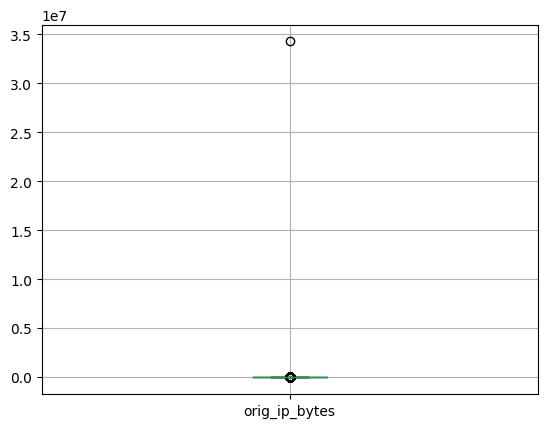

In [27]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
ax = df.boxplot(column='orig_ip_bytes')
ax

<AxesSubplot: >

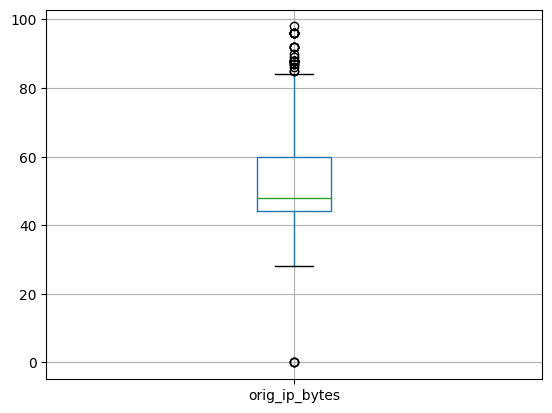

In [28]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes')

<AxesSubplot: >

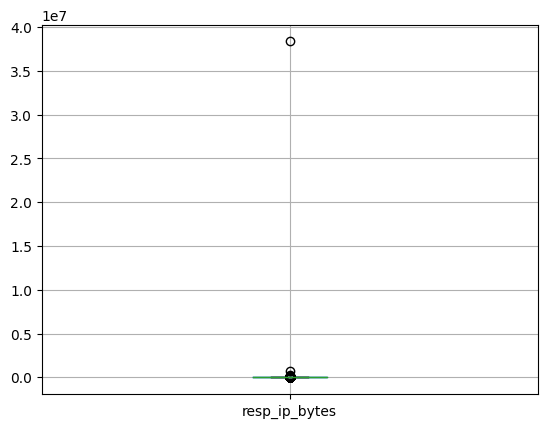

In [29]:
ay = df.boxplot(column='resp_ip_bytes')
ay

<AxesSubplot: >

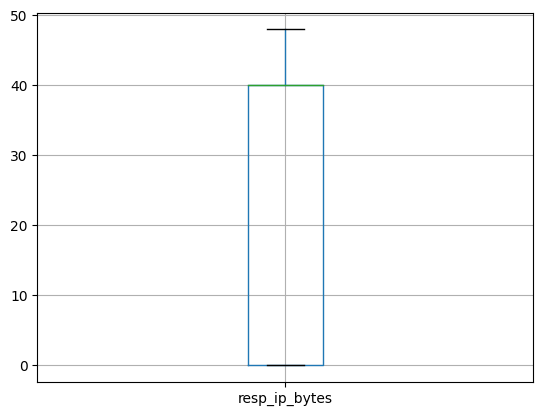

In [30]:
df[df.resp_ip_bytes < 50].boxplot(column='resp_ip_bytes')

In [31]:
orig_norm = (df.orig_ip_bytes-df.orig_ip_bytes.mean())/(df.orig_ip_bytes.std())
resp_norm = (df.resp_ip_bytes-df.resp_ip_bytes.mean())/(df.resp_ip_bytes.std())
print('The normalized values of the originated bytes and the response bytes are:')
print('Originated Bytes:')
print(orig_norm.min(), orig_norm.max(), orig_norm.mean())
print('----------------------------------------------')
print('Response Bytes:')
print(resp_norm.min(), resp_norm.max(), resp_norm.mean())

The normalized values of the originated bytes and the response bytes are:
Originated Bytes:
-0.007143644322842555 150.63681336677044 -6.26194356006081e-19
----------------------------------------------
Response Bytes:
-0.007319679580029734 150.6022138969684 1.252388712012162e-18


/home/sarah/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='orig_ip_bytes', ylabel='resp_ip_bytes'>

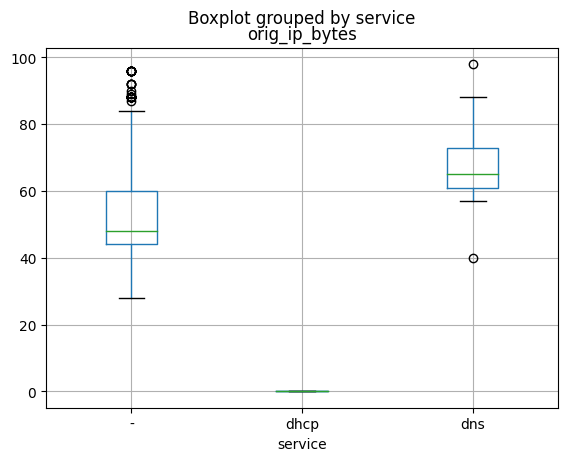

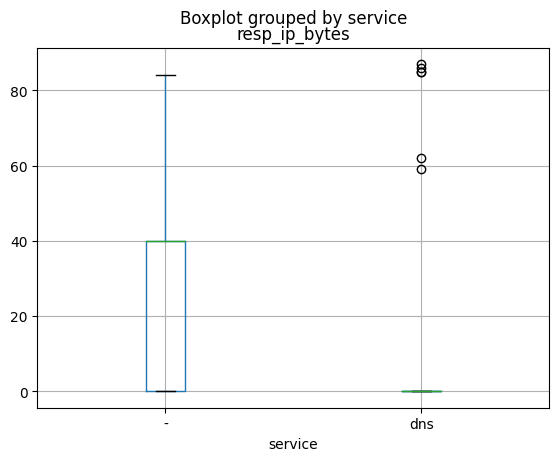

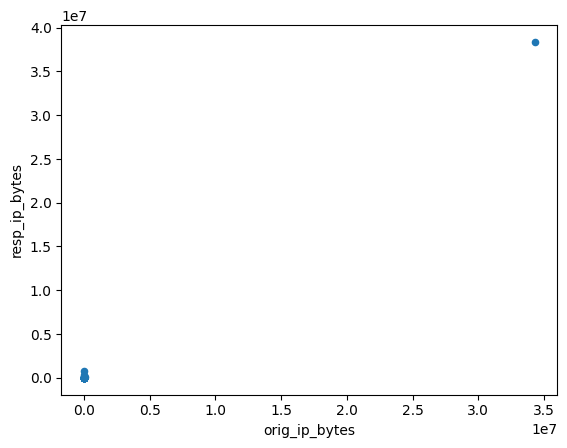

In [35]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes', by='service')
df[df.resp_ip_bytes < 100].boxplot(column='resp_ip_bytes', by='service')
from pandas.plotting import scatter_matrix
df.plot(kind='scatter', x='orig_ip_bytes', y='resp_ip_bytes')


<AxesSubplot: title={'center': 'id.orig_p'}, xlabel='service'>

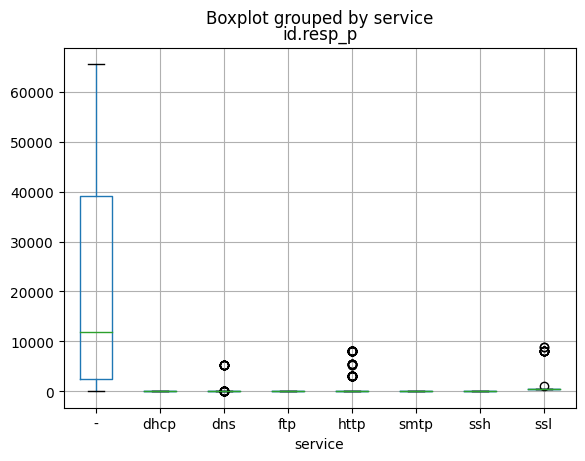

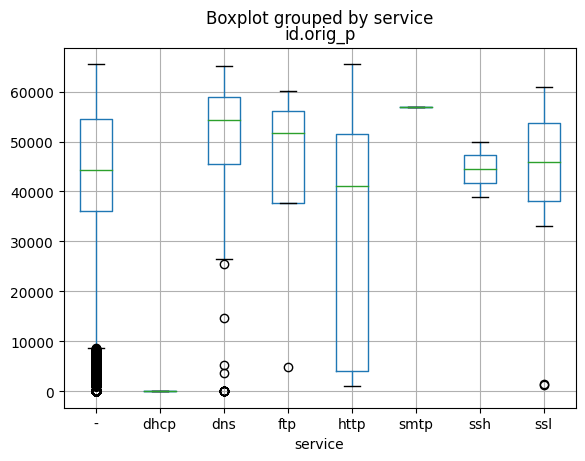

In [36]:
df.boxplot(column='id.resp_p', by='service')
df.boxplot(column='id.orig_p', by='service')

#### Working with the Scatter plot to find a relationship between RESP port and RESP bytes 

/home/sarah/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='resp_ip_bytes', ylabel='id.resp_p'>

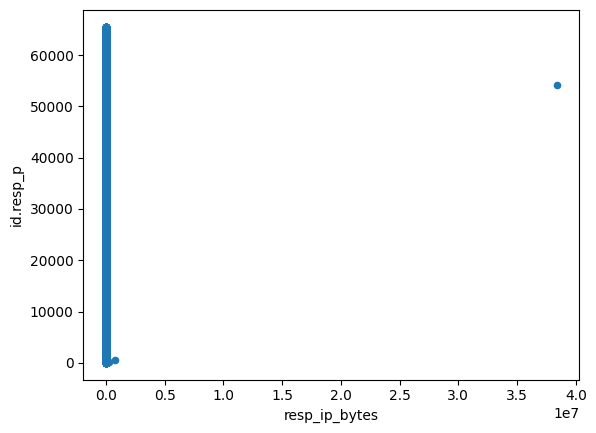

In [38]:
from pandas.plotting import scatter_matrix
df.plot(kind='scatter',x='resp_ip_bytes', y='id.resp_p')

##### Using Seaborn for a clearer understanding of the relationship between ORIG IP bytes, ORIG port number, RESP IP Bytes, and RESP Port numbers.

/home/sarah/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


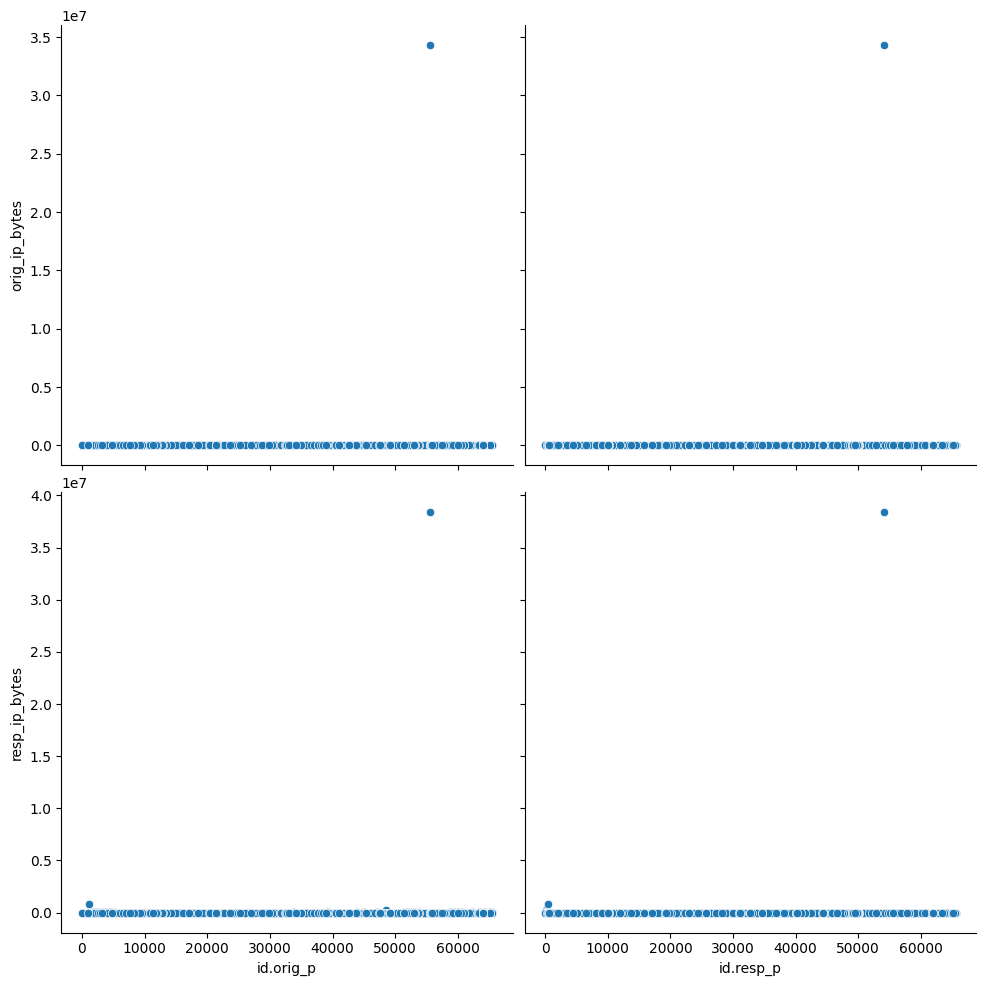

In [39]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
g = sns.pairplot(df, size=5,
           x_vars=["id.orig_p", "id.resp_p"],
               y_vars=["orig_ip_bytes", "resp_ip_bytes"])

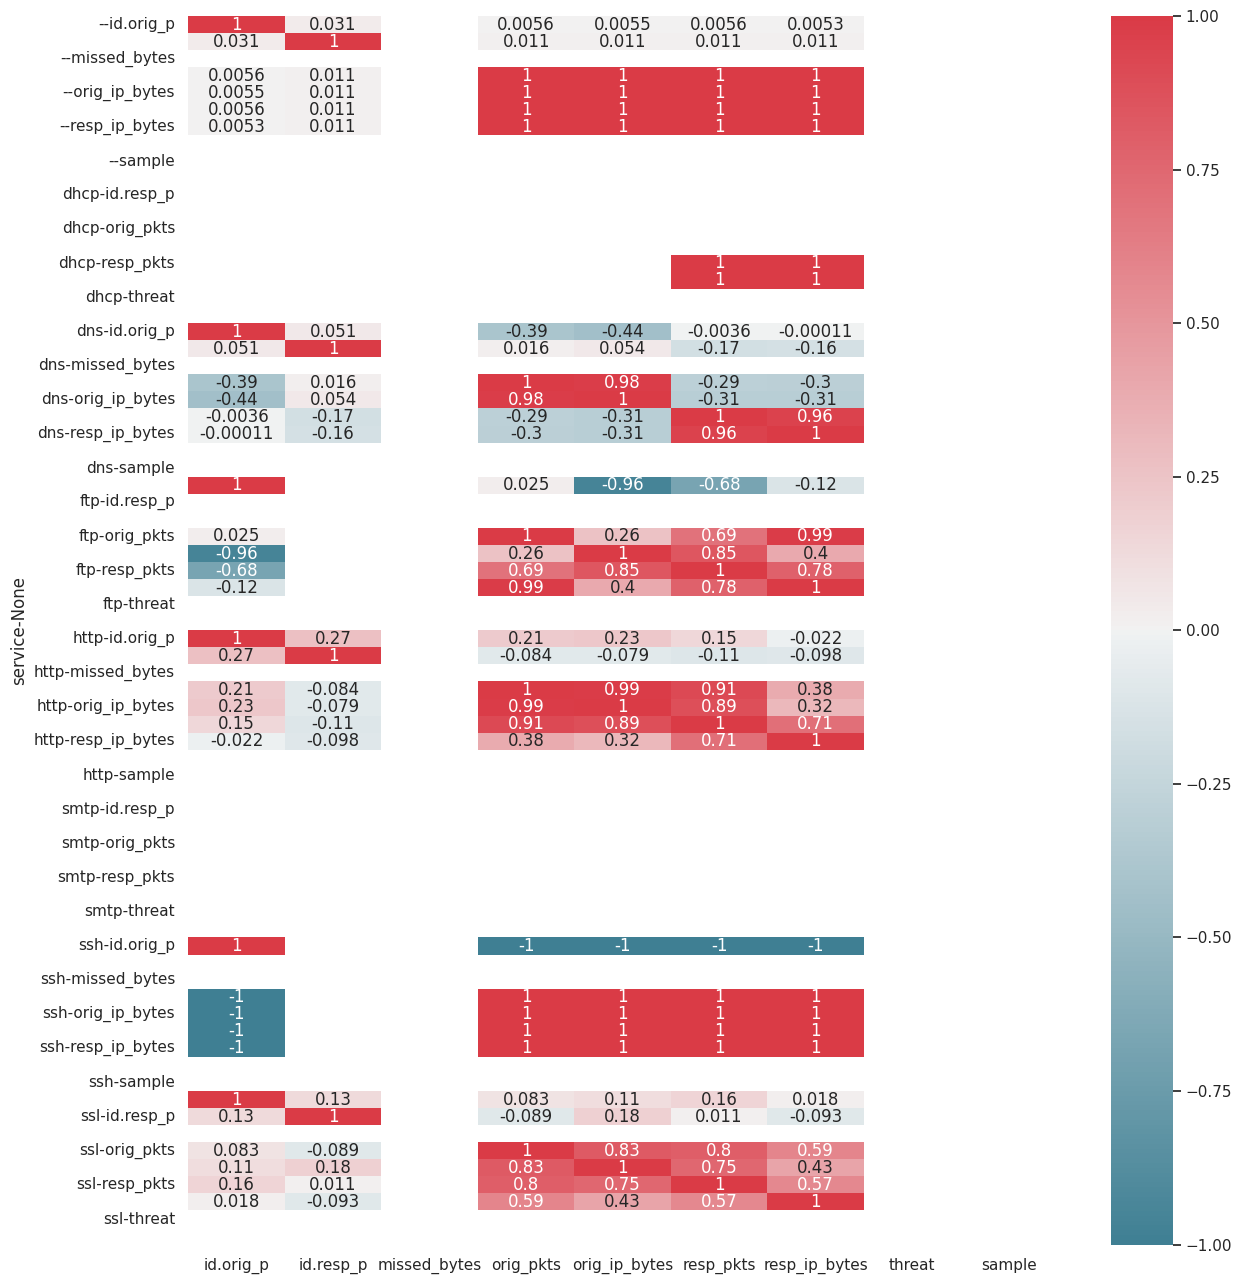

In [40]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_grouped_diff.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [41]:
df[df['service'] == 'ssl'].head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
593,2012-03-16 17:47:39.000,CEOWUU2TjmC9q7u23,192.168.202.79,52559,192.168.229.254,443,tcp,ssl,0.260000,557,...,-,0,ShADadfFr,15,1345,13,1744,(empty),NaN,NaN
626,2012-03-16 17:48:54.450,CtMo4rYJj03VXP6f9,192.168.202.79,54502,192.168.229.254,443,tcp,ssl,0.260000,534,...,-,0,ShADadfrF,15,1322,13,1744,(empty),NaN,NaN
681,2012-03-16 17:50:21.540,Cw5NZa4LBCIXvkJP3l,192.168.202.79,56780,192.168.229.254,443,tcp,ssl,0.010000,538,...,-,0,ShADadfFr,8,962,13,1744,(empty),NaN,NaN
3163,2012-03-16 18:22:02.000,Cucznu2HsgyC4t4pWc,192.168.202.110,34101,192.168.27.253,443,tcp,ssl,0.140000,633,...,-,0,ShADadfR,9,1109,7,2516,(empty),NaN,NaN
3491,2012-03-16 18:23:36.540,CtWYn84MSu8z3YDpxd,192.168.202.110,45970,192.168.27.253,443,tcp,ssl,0.100000,633,...,-,0,ShADadfR,9,1109,7,2516,(empty),NaN,NaN


This df shows all the features with an SSL connection.

SSL is a security protcol and a connection using SSL on a port other than 443 is considered as a potential attack:

In [42]:
ssldf = df[df['service'] == 'ssl']
ssldf[ssldf['id.resp_p'] != 443] 

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
4236,2012-03-16 18:35:14.250000,Cj8fxT6xx6PYIxTs4,192.168.202.110,52062,192.168.27.253,8089,tcp,ssl,0.170000,697,...,-,0,ShADadfR,9,1173,6,2136,(empty),NaN,NaN
9684,2012-03-16 23:21:13.520000,Cf9Eg53AMuMgX7rPNj,192.168.204.45,38563,192.168.202.110,8834,tcp,ssl,0.170000,1004,...,-,0,ShADadfFr,18,2960,20,5466,(empty),NaN,NaN
9927,2012-03-16 23:26:11.510000,Caw3RZ22qiY26Pedll,192.168.204.45,38616,192.168.202.110,8834,tcp,ssl,0.240000,1122,...,-,0,ShADadfFr,16,3092,18,6176,(empty),NaN,NaN
10820,2012-03-17 00:39:30.980000,CPeFOA2DMxyMjYlv2g,192.168.202.4,35996,192.168.26.152,8089,tcp,ssl,5.000000,457,...,-,0,ShADdaFfR,10,961,7,515,(empty),NaN,NaN
17409,2012-03-17 20:44:14.950000,CZ5WMyg0wXhB6Mev9,192.168.202.140,36152,192.168.21.102,993,tcp,ssl,0.020000,50,...,-,0,ShADadR,5,318,3,1405,(empty),NaN,NaN
17646,2012-03-17 20:48:18.160000,C1nEpC47jKfqwDPT2c,192.168.202.140,57590,192.168.21.253,8089,tcp,ssl,0.010000,657,...,-,0,ShADadfR,7,1029,6,2005,(empty),NaN,NaN
17648,2012-03-17 20:48:18.760000,Ctf8Oo4kbhkZKsgyRb,192.168.202.140,57636,192.168.21.253,8089,tcp,ssl,0.020000,657,...,-,0,ShADadfR,7,1029,6,2005,(empty),NaN,NaN
17691,2012-03-17 20:48:40.120000,Co9Rdg1ZksVFWMCtql,192.168.202.140,59343,192.168.21.253,8089,tcp,ssl,0.020000,721,...,-,0,ShADadfR,7,1093,6,2005,(empty),NaN,NaN
18154,2012-03-17 20:53:27.859999,C5M5cxQRTkVO4Q9n9,192.168.202.140,40989,192.168.25.253,8089,tcp,ssl,0.090001,649,...,-,0,ShADadfR,8,1073,6,2120,(empty),NaN,NaN
18165,2012-03-17 20:53:59.130000,CYnB8I34p843FHKp1g,192.168.202.140,49032,192.168.24.253,8089,tcp,ssl,0.010000,721,...,-,0,ShADadfR,7,1093,6,2005,(empty),NaN,NaN


As we can see, we have about 526 probable attacks using the SSL protocol.

In [43]:
httpdf = df[df['service'] == 'http']
httpdf[httpdf['id.resp_p'] != 80]

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
596,2012-03-16 17:47:54.090,CaJAmmP5v29z835h,192.168.202.79,40980,192.168.229.153,5357,tcp,http,0.260000,164,...,-,0,ShADfFa,5,432,3,351,(empty),NaN,NaN
2925,2012-03-16 18:20:10.780,CCD0E6RaWaKg9axL1,192.168.202.110,39469,192.168.27.102,3128,tcp,http,-,-,...,-,0,ShADadfR,7,667,6,3839,(empty),NaN,NaN
2951,2012-03-16 18:20:23.810,C7AAwB2l6isG3jvsNk,192.168.202.110,40576,192.168.27.102,3128,tcp,http,-,-,...,-,0,ShADadfR,7,669,6,3843,(empty),NaN,NaN
2968,2012-03-16 18:20:48.250,CTViLI12AzvlNwx8O6,192.168.202.110,41879,192.168.27.102,3128,tcp,http,0.080000,378,...,-,0,ShADadfR,8,802,6,3987,(empty),NaN,NaN
3051,2012-03-16 18:21:30.070,CazJv31L7021D6jqad,192.168.202.110,45345,192.168.27.102,3128,tcp,http,0.460000,310,...,-,0,ShADadfR,8,734,6,3825,(empty),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,2012-03-17 23:17:05.910,CToDpd4Vdk0Bwnjbqd,192.168.202.138,48966,192.168.21.102,3128,tcp,http,0.010000,359,...,-,0,ShADadfR,7,731,6,3953,(empty),NaN,NaN
20767,2012-03-17 23:17:09.310,CbYR3d1SdcKsWSRqi4,192.168.202.138,49745,192.168.21.102,3128,tcp,http,0.010000,329,...,-,0,ShADadfR,5,597,4,574,(empty),NaN,NaN
20889,2012-03-17 23:20:30.370,CseEs62cUPjoznQROh,192.168.202.138,58950,192.168.21.253,8000,tcp,http,0.010000,298,...,-,0,ShADadR,6,618,4,649,(empty),NaN,NaN
22061,2012-03-18 00:06:30.480,Cr7vL310sXDOp5aQe9,192.168.202.112,57844,192.168.27.102,3128,tcp,http,0.010000,319,...,-,0,ShADadFf,8,743,7,3913,(empty),NaN,NaN


In [44]:
ssldf['resp_ip_bytes'].mean()

3185.714285714286

The mean of the RESP bytes for the HTTP service is:

In [45]:
httpdf['resp_ip_bytes'].mean()

5540.09219858156

SSL bytes size is more than normal, confirming malicious behaviour.

-----